## 6.3. Lineer Regresyon Varsayimlari - Odev

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

from scipy.stats import jarque_bera
from scipy.stats import normaltest

from scipy.stats import bartlett
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

### 1. Sıcaklık Tahmini

In [99]:
# Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

sicaklik = pd.read_csv('weatherHistory.csv')
sicaklik.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [100]:
# Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. 
# Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.

Y = sicaklik["Temperature (C)"]
X = sicaklik[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]

In [101]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:10:02   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. 
# Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

#### Varsayim 1. Katsayilarda modelin dogrusalligi

In [103]:
lrm_test = linear_model.LinearRegression()
lrm_test.fit(sicaklik[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]],sicaklik["Temperature (C)"])

tahmin = lrm_test.predict(sicaklik[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]])

print('Değişkenler: \n', lrm_test.coef_)
print('Sabit değer (bias): \n', lrm_test.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Sabit değer (bias): 
 37.92643818528536


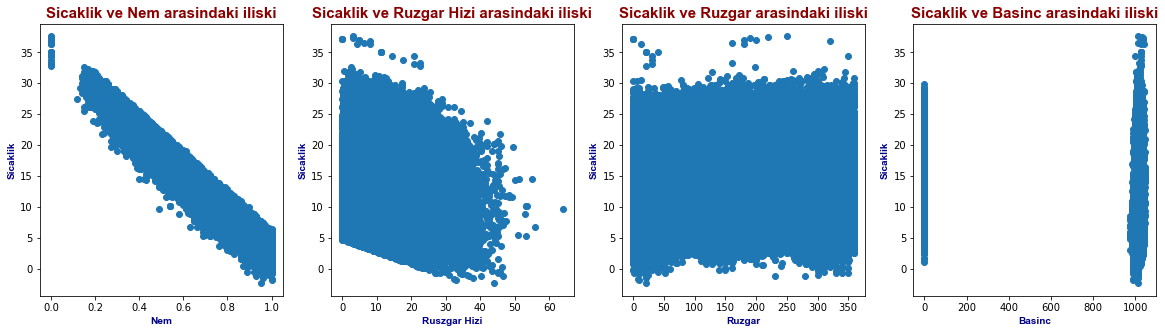

In [104]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(sicaklik["Humidity"], tahmin)
plt.xlabel("Nem", fontdict=eksen_font)
plt.ylabel("Sicaklik", fontdict=eksen_font)
plt.title('Sicaklik ve Nem arasindaki iliski', fontdict=baslik_font)

plt.subplot(1,4,2)
plt.scatter(sicaklik["Wind Speed (km/h)"], tahmin)
plt.xlabel("Ruszgar Hizi", fontdict=eksen_font)
plt.ylabel("Sicaklik", fontdict=eksen_font)
plt.title('Sicaklik ve Ruzgar Hizi arasindaki iliski', fontdict=baslik_font)

plt.subplot(1,4,3)
plt.scatter(sicaklik["Wind Bearing (degrees)"], tahmin)
plt.xlabel("Ruzgar", fontdict=eksen_font)
plt.ylabel("Sicaklik", fontdict=eksen_font)
plt.title('Sicaklik ve Ruzgar arasindaki iliski', fontdict=baslik_font)

plt.subplot(1,4,4)
plt.scatter(sicaklik["Pressure (millibars)"], tahmin)
plt.xlabel("Basinc", fontdict=eksen_font)
plt.ylabel("Sicaklik", fontdict=eksen_font)
plt.title('Sicaklik ve Basinc arasindaki iliski', fontdict=baslik_font)
plt.show()

# SORU: Elimizdeki model icin bunu yapmaya gerek var miydi? Var ise tek tek hep bir degisken icin yapmali miyiz?
# Asagidaki grafikte sadece Nem degiskeninde dogrusal bir iliski gozukuyor. Digerlerinde olmamasi 1. varsayimi
# gerceklestirmedigi anlamina mi geliyor?

#### Varsayim 2. Hata terimi ortalamada sifir olmalidir

In [105]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression()

In [106]:
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Sicaklik modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

# modelin hatalarının ortalaması sıfırdır. Yani 2. varsayimi karsiladigini goruyoruz.

Sicaklik modelinin ortalama hatası : 0.000000000000005


#### Varsayim 3. Homoscedasticity

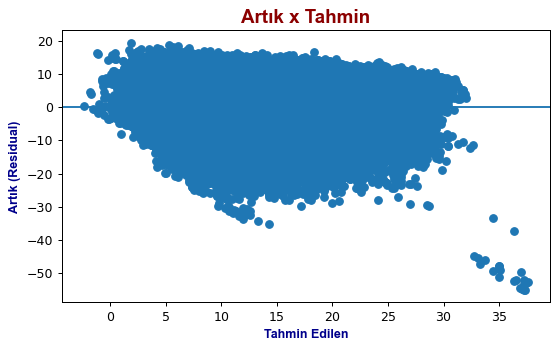

In [107]:
plt.figure(figsize=(7,4), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [108]:
bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


In [109]:
# Her iki testin p değerleri 0.05'ten düşüktür. Bu da hatalarımızın heteroscedastic olduğu anlamına geliyor.

#### Varsayim 4. Düşük çoklu doğrusallık/low multicollinearity

In [110]:
sicaklik[["Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]].corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Temperature (C),1.000000,-0.632255,0.008957,0.029988,-0.005447
Humidity,-0.632255,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,1.000000


In [111]:
# Yukaridaki tabloya baktigimizda 4 farkli ozelliigin birbiriyle dusuk korelasyonu oldugunu goruyoruz.

#### Varsayim 5. Hata terimleri birbiriyle ilişkisiz olmalıdır

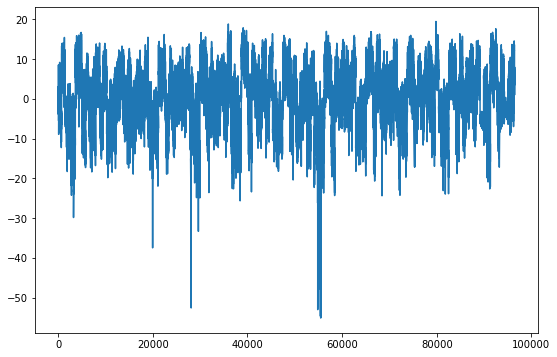

In [112]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

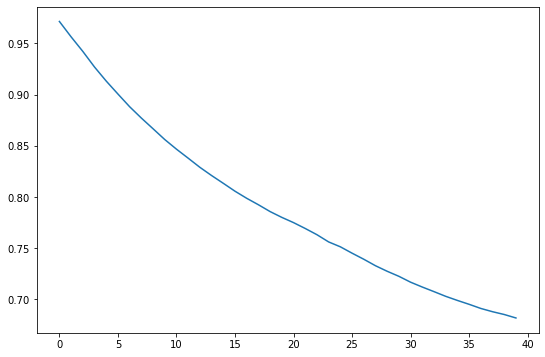

In [113]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

In [114]:
# SORU: Burada otokorelasyon yuksek midir? (0,70 ile 0,95 arasında)

#### Varsayim 6. Ozellikler hatalarla korele olmamalıdır
#### Hatalarin normalligi

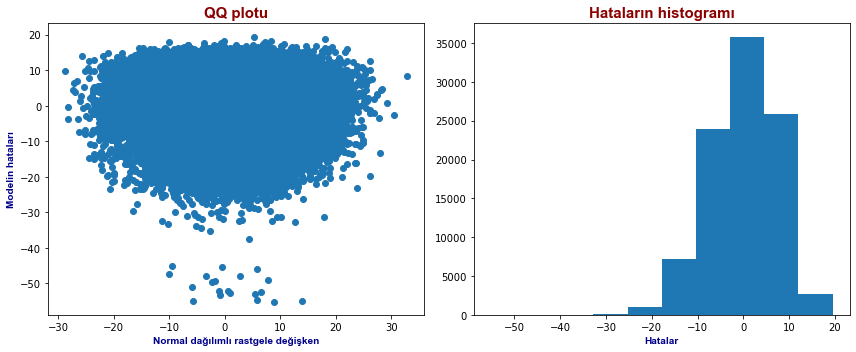

In [115]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [116]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3793.296735252583 ve p değeri : 0.0
Normal test değeri      : 3375.4323076997625  ve p değeri : 0.000000000000000000000000000000


In [117]:
# Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir

### 2. Ev Fiyatlari

In [118]:
# Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.
# Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

ev = pd.read_csv('house_prices_train.csv')
ev = ev.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','LotFrontage'], axis = 1)
ev = ev.dropna()

In [119]:
ev_k = ev.corr()

Text(0.5, 1.0, 'Ev Fiyatlari Korelasyon')

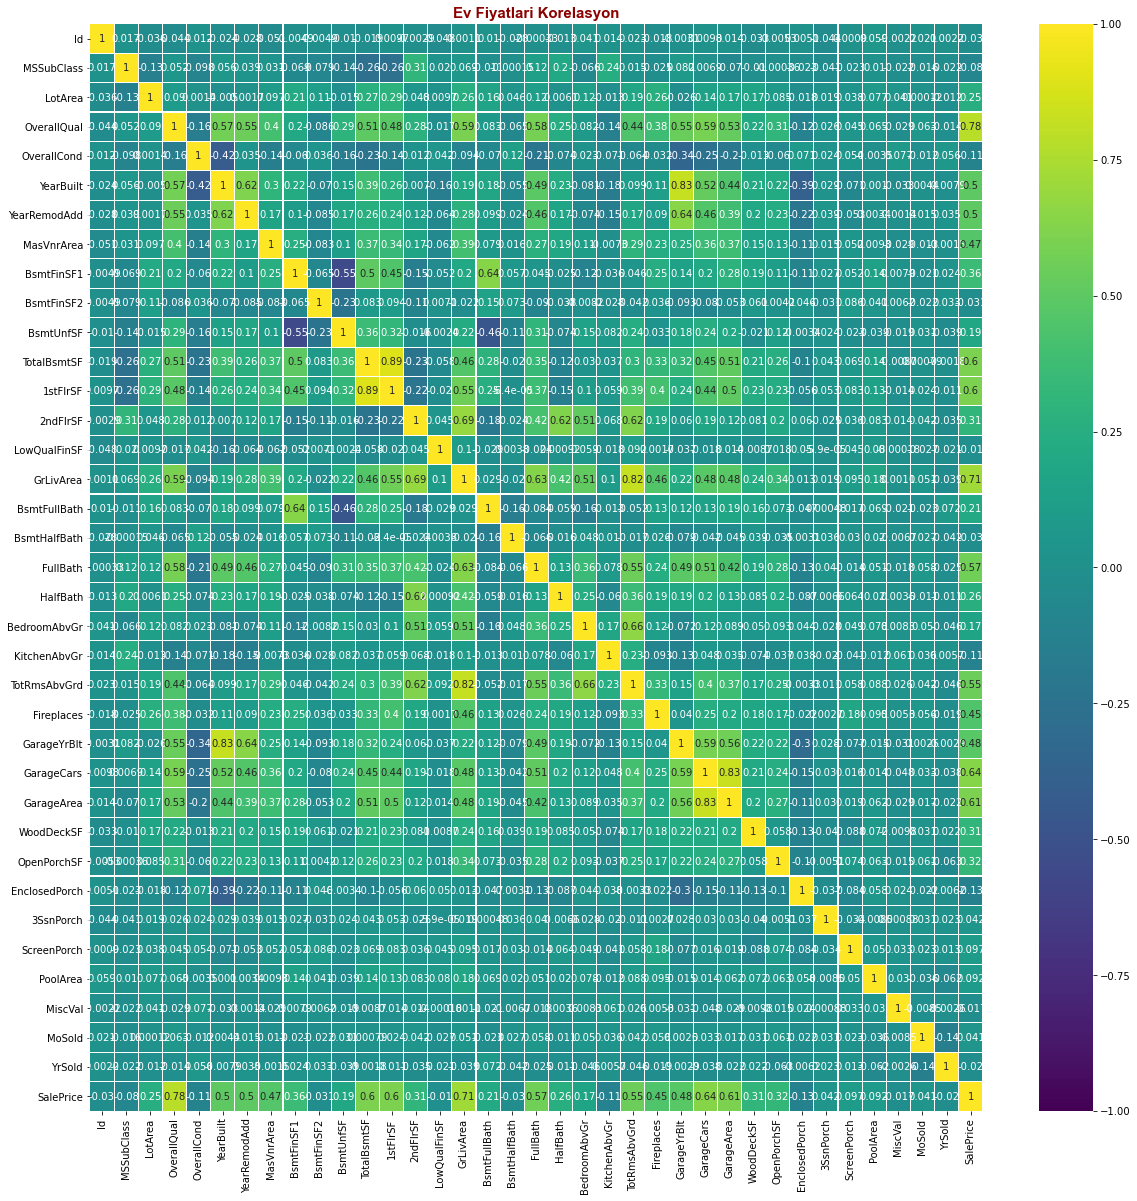

In [120]:
plt.figure(figsize=(20,20))
sns.heatmap(ev_k, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Ev Fiyatlari Korelasyon", fontdict = baslik_font)

In [121]:
# Korelasyon martisinde ev fiyatlariyla korelasyonu 0.6 uzeri olan degiskenleri modelim icin tutacagim
ev = ev[['OverallQual','GrLivArea','GarageArea','GarageCars','SalePrice']]

In [122]:
A = ev['SalePrice']
B = ev[['OverallQual','GrLivArea','GarageArea','GarageCars']]

In [123]:
B = sm.add_constant(B)
results = sm.OLS(A,B).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     931.2
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:10:29   Log-Likelihood:                -16093.
No. Observations:                1338   AIC:                         3.220e+04
Df Residuals:                    1333   BIC:                         3.222e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.111e+05   5336.677    -20.813      0.000   -1.22e+05   -1.01e+05
OverallQual  2.745e+04   1155.607     23.751      0.000    2.52e+04    2.97e+04
GrLivArea      49.8813      2.731     18.262      0.000      44.523      55.240
GarageArea     45.0631     10.847      4.154      0.000      23.784      66.342
GarageCars   1.487e+04   3332.807      4.461      0.000    8329.604    2.14e+04
==============================================================================
Omnibus:                      351.713   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12312.806
Skew:                           0.505   Prob(JB):                         0.00
Kurtosis:                      17.827   Cond. No.                     8.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# Varsayim 1. Katsayilarda modelin dogrusalligi

lrm_test1 = linear_model.LinearRegression()
lrm_test1.fit(ev[['OverallQual','GrLivArea','GarageArea','GarageCars']],ev["SalePrice"])

tahmin_ev = lrm_test1.predict(ev[['OverallQual','GrLivArea','GarageArea','GarageCars']])

print('Değişkenler: \n', lrm_test1.coef_)
print('Sabit değer (bias): \n', lrm_test1.intercept_)

Değişkenler: 
 [27447.16970715    49.88128928    45.06313289 14867.72138561]
Sabit değer (bias): 
 -111070.06111499615


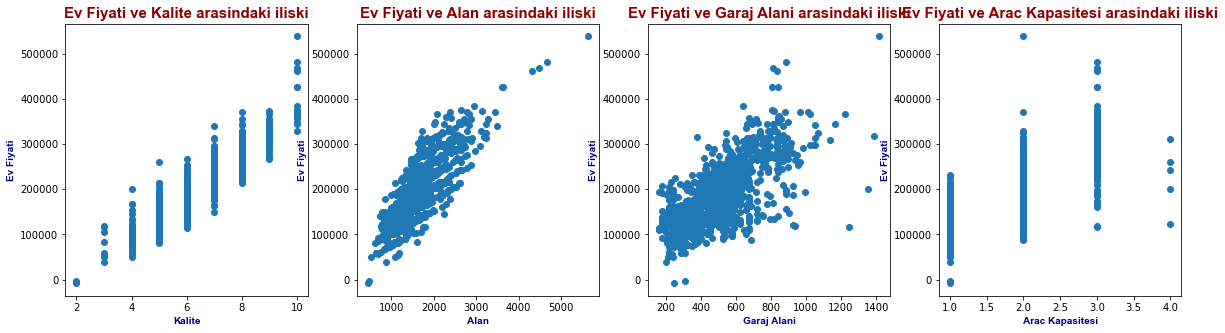

In [125]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(ev["OverallQual"], tahmin_ev)
plt.xlabel("Kalite", fontdict=eksen_font)
plt.ylabel("Ev Fiyati", fontdict=eksen_font)
plt.title('Ev Fiyati ve Kalite arasindaki iliski', fontdict=baslik_font)

plt.subplot(1,4,2)
plt.scatter(ev["GrLivArea"], tahmin_ev)
plt.xlabel("Alan", fontdict=eksen_font)
plt.ylabel("Ev Fiyati", fontdict=eksen_font)
plt.title('Ev Fiyati ve Alan arasindaki iliski', fontdict=baslik_font)

plt.subplot(1,4,3)
plt.scatter(ev['GarageArea'], tahmin_ev)
plt.xlabel("Garaj Alani", fontdict=eksen_font)
plt.ylabel("Ev Fiyati", fontdict=eksen_font)
plt.title('Ev Fiyati ve Garaj Alani arasindaki iliski', fontdict=baslik_font)

plt.subplot(1,4,4)
plt.scatter(ev["GarageCars"], tahmin_ev)
plt.xlabel("Arac Kapasitesi", fontdict=eksen_font)
plt.ylabel("Ev Fiyati", fontdict=eksen_font)
plt.title('Ev Fiyati ve Arac Kapasitesi arasindaki iliski', fontdict=baslik_font)

plt.show()

In [126]:
# Varsayim 2. Hata terimi ortalamada sıfır olmalıdır

lrm_ev = linear_model.LinearRegression()
lrm_ev.fit(B,A)

LinearRegression()

In [127]:
tahmin_ev = lrm.predict(B)
hatalar_ev = A - tahmin_ev

print("Ev Fiyati modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

# modelin hatalarının ortalaması sıfırdır. Yani 2. varsayimi karsiladigini goruyoruz.

Ev Fiyati modelinin ortalama hatası : 0.000000000000005


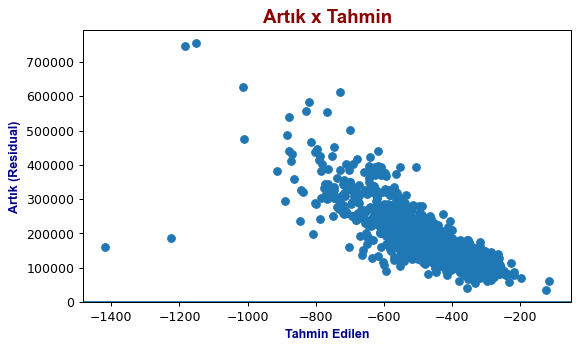

In [128]:
# Varsayim 3. Homoscedasticity

plt.figure(figsize=(7,4), dpi=90)
plt.scatter(tahmin_ev, hatalar_ev)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [129]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin_ev, hatalar_ev)
lev_stats = levene(tahmin_ev, hatalar_ev)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 15189.2 ve p değeri : 0.000000000000000000000
Levene test değeri   : 1134.79 ve p değeri : 0.000000000000000000000


In [130]:
# Varsayim 4. Düşük çoklu doğrusallık/low multicollinearity

ev[['OverallQual','GrLivArea','GarageArea','GarageCars','SalePrice']].corr()

,OverallQual,GrLivArea,GarageArea,GarageCars,SalePrice
OverallQual,1.000000,0.594470,0.530092,0.591878,0.783546
GrLivArea,0.594470,1.000000,0.477868,0.483943,0.711706
GarageArea,0.530092,0.477868,1.000000,0.832166,0.607535
GarageCars,0.591878,0.483943,0.832166,1.000000,0.640154
SalePrice,0.783546,0.711706,0.607535,0.640154,1.000000


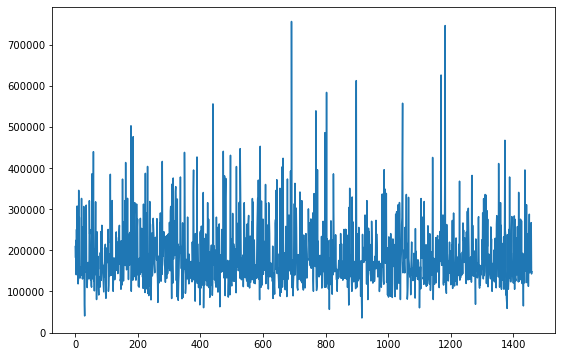

In [131]:
# Varsayim 5. Hata terimleri birbiriyle ilişkisiz olmalıdır

plt.figure(figsize=(9,6))
plt.plot(hatalar_ev)
plt.show()

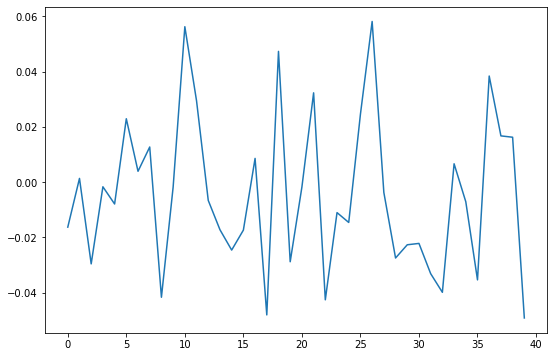

In [132]:
from statsmodels.tsa.stattools import acf

acf_data_ev = acf(hatalar_ev)

plt.figure(figsize=(9,6))
plt.plot(acf_data_ev[1:])
plt.show()

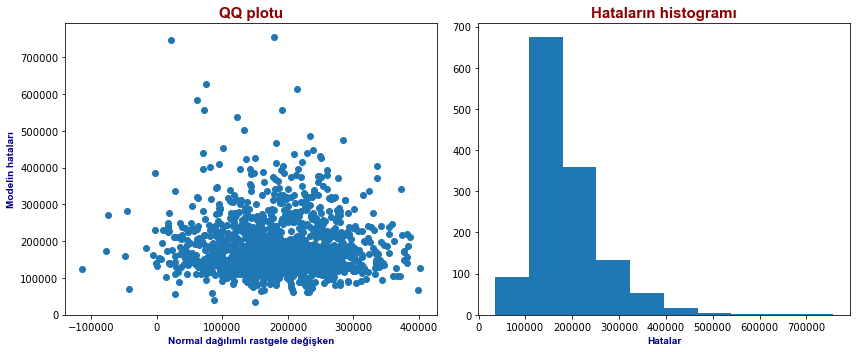

In [133]:
# Varsayim 6. Ozellikler hatalarla korele olmamalıdır
# Hatalarin normalligi

rand_nums_ev = np.random.normal(np.mean(hatalar_ev), np.std(hatalar_ev), len(hatalar_Ev))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums_ev, hatalar_ev)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar_ev)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [134]:
jb_stats_ev = jarque_bera(hatalar_ev)
norm_stats_ev = normaltest(hatalar_ev)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats_ev[0], jb_stats_ev[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats_ev[0], norm_stats_ev[1]))

Jarque-Bera test değeri : 3399.7288368902923 ve p değeri : 0.0
Normal test değeri      : 580.0681056683371  ve p değeri : 0.000000000000000000000000000000
